In [1]:
import matplotlib.pyplot as plt
import numpy as np

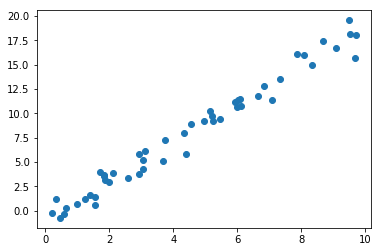

In [2]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

# Основы API статистического оценивания библиотеки Scikit-learn

#### Регрессия(обучения с учителем): Простая линейная регрессия (linear_model.LinearRegression)

Обычно использование API Scikit-learn включает следующие шаги:

1. Выбор класса модели

In [3]:
# (Импортируем класс линейной регрессии)
from sklearn.linear_model import LinearRegression

2. Выбор гиперпараметров модели. 
Неорбходимо выбрать дополнительные параметры с которыми наша модель будет работать. (у каждой модели они свои)
   - Хотим ли мы нормализовать модель?
   - Хотим ли выполнить подбор сдвига?
   - Хотим ли сделать модель более гибкой,  выполнив предварительно обработку признаков?
   - Какая степень регуляризации должна быть у нашей модели?
   - Сколько компонент модели мы бы хотели бы использовать?

In [4]:
# Создадим экземпляр класса
model = LinearRegression(fit_intercept=True) 
# и указываем с помощью доп параметра, что хотим выполнить подбор точки пересечения с осью ординат
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

3. Формирования из данных матриц признаков и целевого вектора

In [5]:
# данные в Scikit-learn необходимо представлять в виде:
# двумерной матрицы признаков [n_samples, n_features] и одномерный целевой вектор

# Для этого нам необходим проделать некоторые манипуляции чтобы x превратился в двумерны массив n_samples
# y уже сразу дан в необхожимом виде
X = x[:, np.newaxis]
X.shape

(50, 1)

4. Обучение модели на данных

In [6]:
# Команда fit() выполняет обучение на данных, выполняя под капотом множество вычислений
model.fit(X, y)
# и сохраняя результаты этих вычислений в атрибуты модели

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# по традиции все параметры модели полученные в процессе выполнения команды fit() содержат в концу названия подчеркивание
print(model.coef_, model.intercept_)
# эти два параметра представляют собой угловой коэффициент и точку пересечения с осью координат
# Сравнивая с изначаьными данными видим 2 и -1 видим, что они очень изки

[1.9776566] -0.9033107255311164


5. Предсказание меток для новых данных

In [8]:
# После обучения модели главная задача машинного обучения с учителем заключается
# в вычислении с ее помощью значений для новых данных.
# Сделать это можно посредством метода predict()
# В этом примере наши данные это сетка x-значений и нас интересует какие данные примет y-значение
xfit = np.linspace(-1, 11)
# как и ранее представляем это все виде [n_samples, n_features]
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)  # подаем данные на вход модели

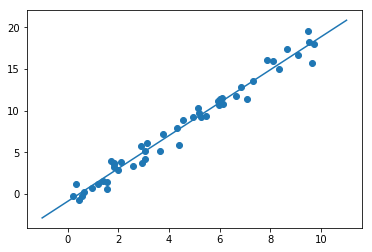

In [9]:
# и визуализируем входные данные
plt.scatter(x, y)
# и результат
plt.plot(xfit, yfit);
# обычно эффективность модели оценивают сравнивая ее результаты с эталоном - увидим далее

#### Классификация(обучение с учителем): Гауссов наивный байсевский классификатор (naive_bayes.GaussianNB)

In [10]:
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import os

In [11]:
path = os.path.join(os.getcwd(), 'sns')

In [12]:
path

'C:\\MLPath\\Study\\Scikit-learn\\sns'

In [13]:
# Загрузим данные Iris
iris = sns.load_dataset('iris', data_home=path)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


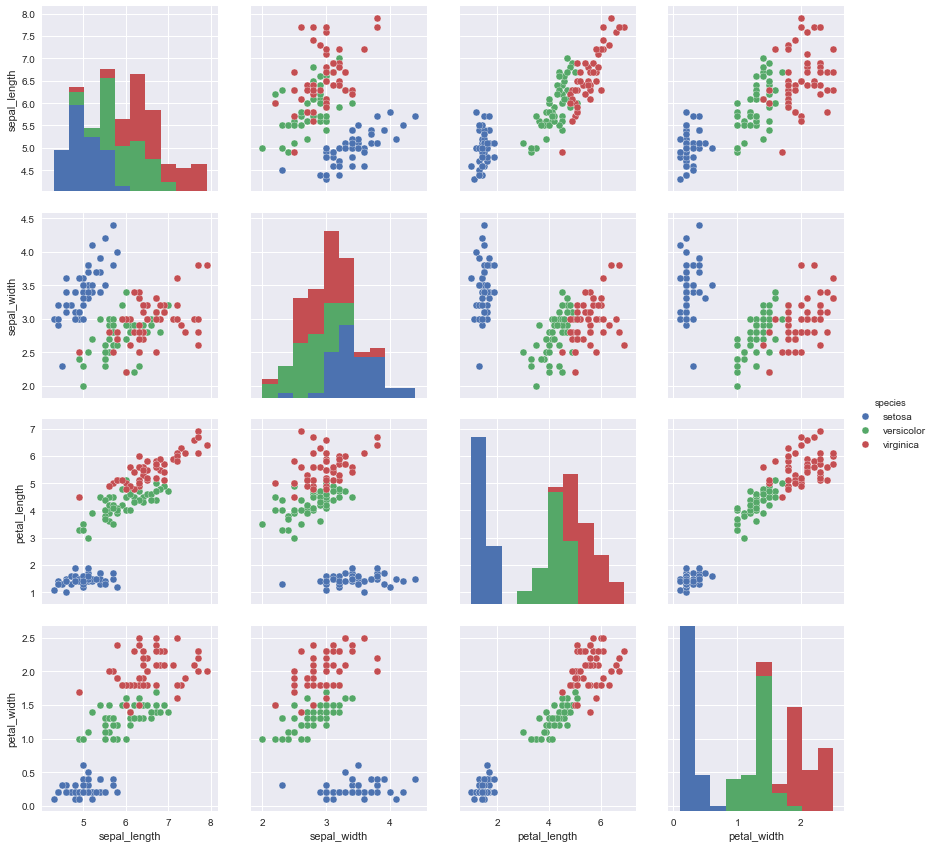

In [14]:
sns.pairplot(iris, hue='species', size=3);

In [15]:
# для использования данного набора данных необходимо привести данные к стандартному виду: двумерной матрицу признаков и 
# и целевому массиву из объекта DataFrame
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [16]:
# Разделим данные на обучаюшую и контрольные последовательности
# Можно это сделать вручную но мы воспользуемся вспомогательной функцией train_test_split
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# Данный классификатор очень простой и исходит из допущения что все классы выровнены по осям координат
# Обучение с учителем, классификация
# Далее может будет больше про этот классификатор

# 1. Выбираем класс модели
from sklearn.naive_bayes import GaussianNB
# 2. Создаем экземпляр модели
model = GaussianNB()
# 3. Обучаем модель на данных
model.fit(Xtrain, ytrain)
# 4. Предсказываем значения 
y_model = model.predict(Xtest)

In [18]:
# Воспользуемся утилитой accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)
# 97% точность определения Для этого набора данных даже наивный классификатор

0.9736842105263158

#### Понижение размерности(обучения без учителя): Метод главных компонент (decomposition.PCA)

In [19]:
# в качестве примера обучения без учителя - понижение размерности методом главных компонент

# 1) Выбираем класс модели
from sklearn.decomposition import PCA
# 2) Создаем экземпляр модели с гиперпараметрами
model = PCA(n_components=2)
# 3) Обучаем модель на данных(только по X!)
model.fit(X_iris)
# 4) Преобразуем данные в двумерные
X_2D = model.transform(X_iris)

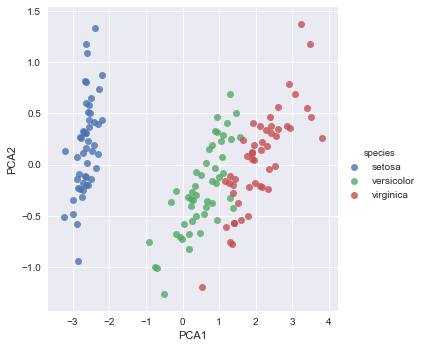

In [20]:
# Построим график полученных результатов
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

# Воспользуемся для этого функцией lmplot
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False);
# В двумерном представлении виды цветов неплохо разделены, хотя алгоритм PCA ничего не знает о видах цветов

#### Кластеризация(обучение без учителя) - смесь Гаусовых распределений(mixture.GaussianMixture)

In [21]:
# 1) Выбираем класс модели
from sklearn.mixture import GaussianMixture as GMM
# 2) Создаем экземпляр модели с гиперпараметрами
model = GMM(n_components=3, covariance_type='full')
# 3) Обучаем модель на данных(y не указан)
model.fit(X_iris)
# 4) Определяем метки кластеров
y_gmm = model.predict(X_iris)

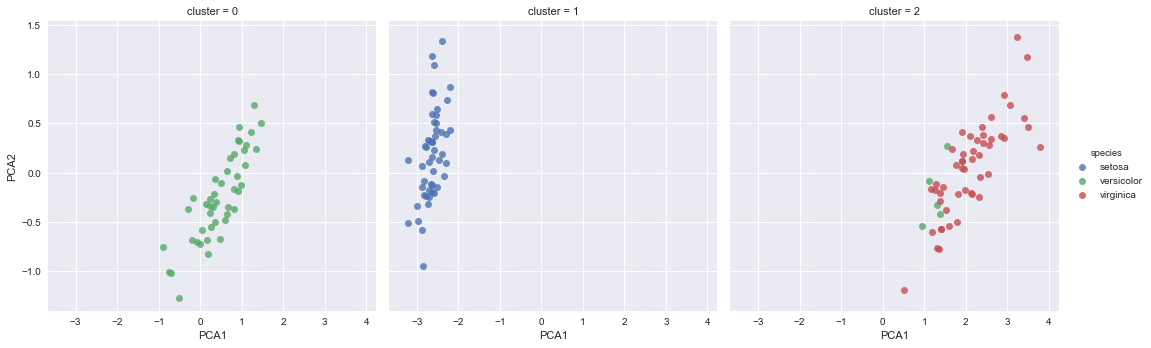

In [22]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False);
# мы видим насколько хорошо кластеры выделенных алгоритмом соответствуют реальной классификации
# и это простая кластеризация

#### Прикладная задача: анализ рукописных цифр

In [23]:
# применение методов обучения на более интересной задаче распознавания цифр
# Загрузим данные цифр
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

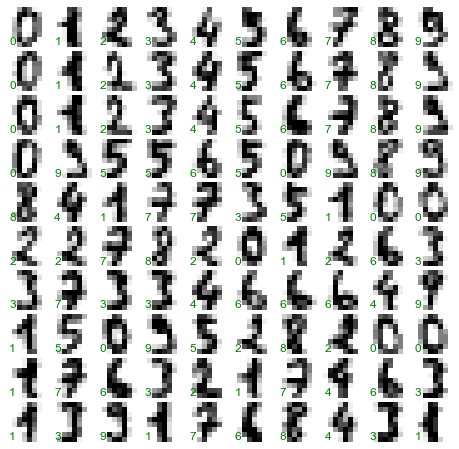

In [24]:
# примеры цифр
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
              interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [25]:
# Для работы с этими данными нужно получить их двумерное представление [n_samples, n_features]
# поэтому мы будем трактовать каждый пиксел как признак, т.е. расплющим массивы пикселов
# так чтобы каждую цифру представлял массив пикселов длиной 64 элемента
# Кроме того, нам понадобится целевой массив, задающий предопределенную метку

X = digits.data
y = digits.target

print(X.shape, y.shape)
# получаем 1797 выборок и 64 элемента

(1797, 64) (1797,)


In [26]:
# Визуализируем наши данные, но для этого сначала нужно получить их двумерное представление
# Для понижения размерности будем использовать алгоритм обучения на базе многообразий - Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

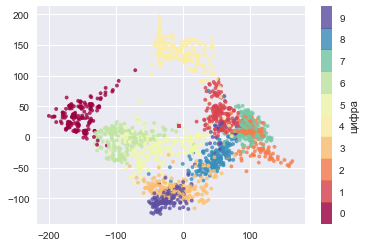

In [27]:
# Теперь наши данные двумерны построим график данных 
plt.scatter(data_projected[:, 0], data_projected[:, 1], s=15,
            c=digits.target, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='цифра', ticks=range(10))
plt.clim(-0.5, 9.5);
# группы довольно хорошо разнесены в параметрическом пространстве. 
# Это значит, что и простой алгоритм должен справится с классификацией

Применим алгоритм классификации к гашим цифрам. (Гауссову наивную байесовскую модель)

In [28]:
# как и в случае с набором данных iris разобьем данные на обучающую и контрольную выборки
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [29]:
# Обучаем Гауссову наивную байсовскую модель
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [30]:
# оценим точность
accuracy_score(ytest, y_model)

0.8333333333333334

Даже при очень простой модели мы получили более 80% точность классификации цифр.

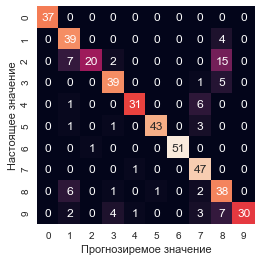

In [31]:
# Однако из одного числа сложно понять где наша модель ошиблась.
# Для этой цели удобна матрица различий(confusion matrix)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Прогнозиремое значение')
plt.ylabel('Настоящее значение');

In [32]:
# Просмотр карт цветов
# plt.cm.

In [33]:
Xtest.shape

(450, 64)

In [34]:
# Тестовую выборку представим в форме для изображения
Xtest_img = Xtest.reshape((450, 8, 8))

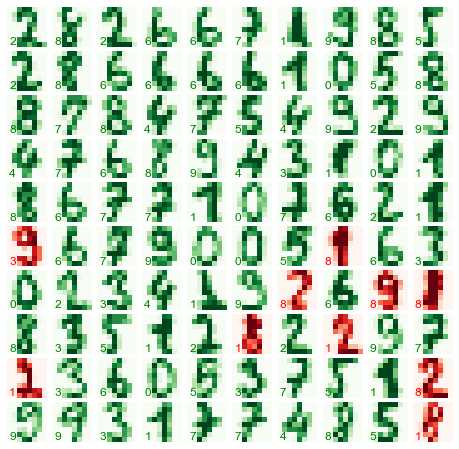

In [35]:
# Еще можно построить график входных данных вместе с предсказанными метками
# И использовать зеленый цвет для правильных и красный для ошибочных

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest_img[i], cmap='Greens' if (ytest[i] == y_model[i]) else 'Reds', 
              interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Из такого пожмножества можно попробовать подчерпнуть полезную информацию о сллабых местах нашего алгоритма.

Чтобы улучшить точность стоит попробовать использовать более сложный механизм - Метод опорных векторов, случайные леса или другие методы классификации.